<a href="https://colab.research.google.com/github/Gurjot-Singh-2002/UML501-Lab-Assignments/blob/main/Assignment%207/102203582_3CO14_ODD2024_A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1 K-Means

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv('USA_Housing.csv')

In [5]:
# Display the first few rows to understand the structure
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  


In [6]:
# Omit the last column (the target column)
df = df.iloc[:, :-1]

In [7]:
# Normalize the data (optional but recommended for K-Means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
# Implement K-Means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [11]:
# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

In [12]:
# Show the clustered data
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  Cluster  
0                          4.09      23086.80050        2  
1                          3.09      40173.07217        0  
2                          5.13      36882.15940        1  
3                          3.26      34310.24283        3  
4                          4.23      26354.10947        2  


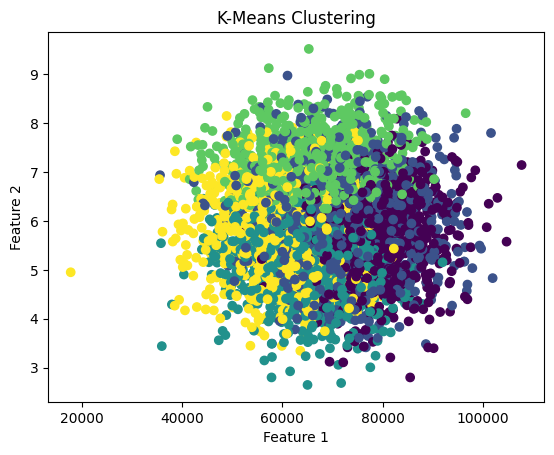

In [14]:
# Visualize the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [15]:
# Get the centroids of the clusters
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 0.83496415 -0.21482045 -0.78538477 -0.64589136  0.41334254]
 [ 0.29687004  0.06858999  0.8994013   1.21568169 -0.17200674]
 [-0.39368026 -0.76596194 -0.27110443 -0.40940419 -0.87501926]
 [-0.22534233  1.17493764 -0.46833662 -0.4916989  -0.38417656]
 [-0.79201925 -0.17792156  0.37354533 -0.07847523  1.02474434]]


#Q2 K-Medoids

In [17]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=ced45fb0613c5d768b91ead2c5aacc1262b5cee7da32aa013bfe45401f6ca5d1
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


In [18]:
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [19]:
# Load the dataset
df = pd.read_csv('USA_Housing.csv')

In [20]:
# Display the first few rows to understand the structure
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  


In [21]:
# Omit the last column (the target column)
df = df.iloc[:, :-1]

In [22]:
# Normalize the data (optional but recommended for K-Medoids)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [23]:
# Convert the data to a list of lists format, as required by pyclustering
data = df_scaled.tolist()

In [24]:
# Initialize K-Medoids with number of clusters
initial_medoids = [0, 1, 2, 3, 4]
kmedoids_instance = kmedoids(data, initial_medoids)

In [25]:
# Perform the clustering
kmedoids_instance.process()

In [26]:
# Get the clusters and the final medoids
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

In [27]:
# Show the resulting clusters
print(f'Clusters: {clusters}')
print(f'Medoids: {medoids}')

Clusters: [[0, 4, 9, 14, 15, 23, 24, 32, 33, 34, 36, 44, 46, 54, 55, 57, 68, 74, 89, 91, 97, 111, 116, 122, 124, 136, 140, 151, 154, 156, 159, 165, 166, 180, 193, 196, 201, 203, 212, 220, 224, 226, 227, 229, 235, 238, 245, 255, 263, 265, 268, 275, 288, 290, 295, 296, 303, 304, 308, 312, 318, 321, 322, 324, 325, 329, 330, 331, 338, 342, 349, 364, 368, 369, 371, 373, 383, 385, 386, 402, 403, 405, 409, 416, 435, 441, 444, 445, 453, 457, 462, 463, 469, 474, 476, 479, 483, 490, 494, 501, 502, 505, 513, 525, 526, 536, 544, 545, 547, 548, 554, 560, 565, 569, 576, 580, 585, 586, 589, 592, 597, 605, 608, 609, 616, 624, 637, 641, 644, 649, 650, 653, 654, 656, 660, 668, 682, 683, 695, 697, 699, 706, 708, 709, 724, 730, 735, 737, 742, 756, 780, 787, 789, 794, 798, 800, 803, 819, 820, 822, 823, 827, 829, 830, 834, 845, 847, 865, 870, 876, 884, 889, 899, 907, 909, 920, 921, 931, 933, 946, 950, 952, 956, 958, 961, 962, 972, 975, 980, 982, 987, 992, 994, 996, 998, 999, 1001, 1004, 1009, 1023, 1026, 10

In [32]:
# Optionally, we can add the cluster labels to your dataframe
df['Cluster'] = -1
for cluster_id, cluster_points in enumerate(clusters):
    for point_index in cluster_points:
        df.iloc[point_index, -1] = cluster_id


In [33]:
# Show the dataframe with clusters
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  Cluster  
0                          4.09      23086.80050        0  
1                          3.09      40173.07217        1  
2                          5.13      36882.15940        2  
3                          3.26      34310.24283        3  
4                          4.23      26354.10947        0  


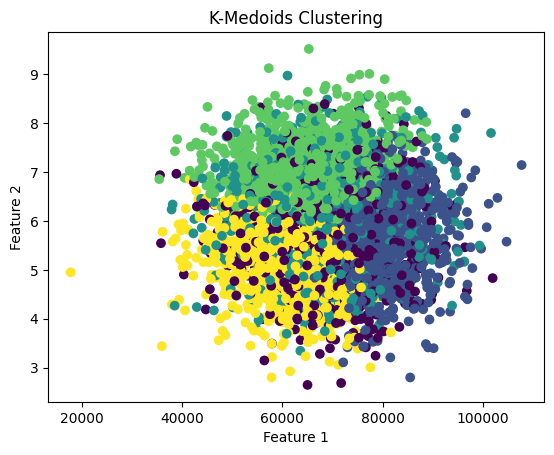

In [34]:
# Visualizing the clusters
# For simplicity, we'll plot the first two features of the dataset
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [35]:
# Print the final medoids
print(f"Final Medoids (Indices of the medoid points): {medoids}")

Final Medoids (Indices of the medoid points): [2641, 3084, 146, 3574, 2785]


#Using SSE

#Elbow Method for K-Medoids

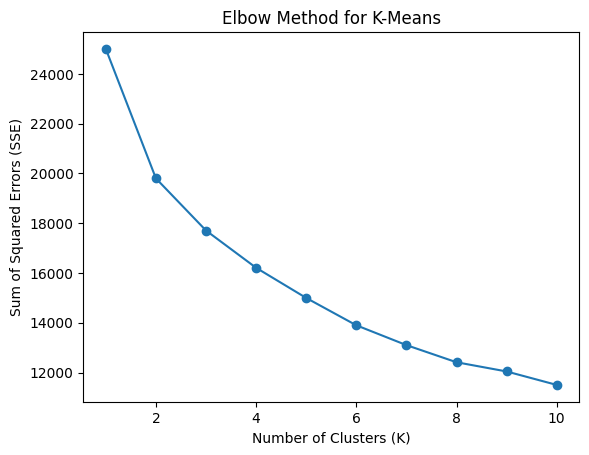

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (assuming it's in CSV format)
df = pd.read_csv('USA_Housing.csv')

# Omit the last column (assuming it is the target column or unnecessary attribute)
df = df.iloc[:, :-1]

# Normalize the data (optional but recommended for K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Function to calculate SSE for K-Means
def calculate_sse(k, data):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse = kmeans.inertia_  # Inertia is the sum of squared distances to centroids
    return sse

# Calculate SSE for a range of K values
sse_values = []
k_range = range(1, 11)  # Testing K from 1 to 10
for k in k_range:
    sse = calculate_sse(k, df_scaled)
    sse_values.append(sse)

# Plot SSE vs K to visualize the elbow
plt.plot(k_range, sse_values, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

#Elbow Method for K-Memoids

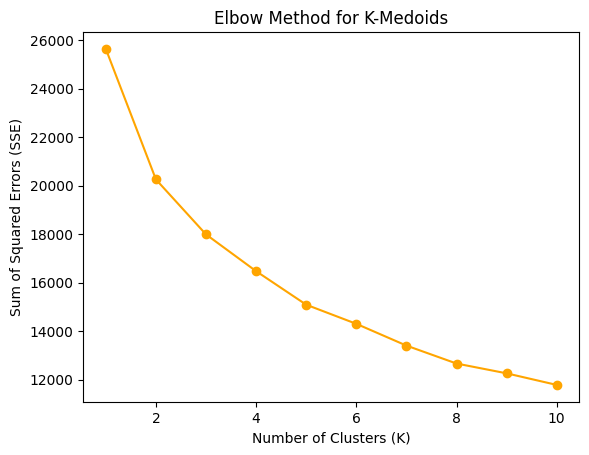

In [37]:
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import pairwise_distances

# Function to calculate SSE for K-Medoids
def calculate_sse_kmedoids(k, data):
    # Randomly choose k initial medoids
    initial_medoids = list(range(k))  # Selecting first K data points as initial medoids
    kmedoids_instance = kmedoids(data, initial_medoids)

    # Perform the clustering
    kmedoids_instance.process()

    # Get the clusters and medoids
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # Calculate SSE: sum of squared distances from each point to its medoid
    sse = 0
    for cluster_id, cluster_points in enumerate(clusters):
        medoid = medoids[cluster_id]
        for point_index in cluster_points:
            sse += np.sum((np.array(data[point_index]) - np.array(data[medoid])) ** 2)
    return sse

# Calculate SSE for a range of K values
sse_values_kmedoids = []
for k in k_range:
    sse = calculate_sse_kmedoids(k, df_scaled)
    sse_values_kmedoids.append(sse)

# Plot SSE vs K to visualize the elbow for K-Medoids
plt.plot(k_range, sse_values_kmedoids, marker='o', color='orange')
plt.title('Elbow Method for K-Medoids')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()